In [16]:
from math import *
import numpy as np
#from uncertainties import *
#from uncertainties import unumpy as unp
import matplotlib.pylab as plt
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy import special, optimize
from scipy.misc import factorial
import matplotlib
from matplotlib import pyplot as plt
#import ThonkTools as TT
import numpy as np
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt
from scipy import interpolate
from scipy.optimize import curve_fit

def errplot(x):
    """takes an uncertainties uarray and returns the 
    tuple (values, errors)
    -values: a numpy array that contains all the values
        of your uncertainties uarray 
    -errors: a numpy array that contains all the errors
        of your uncertainties uarray
    """
    
    values = []
    errors = []
    for i in range(len(x)):
        values.append(x[i].nominal_value)
        errors.append(x[i].std_dev)
    values = np.asarray(values)
    errors = np.asarray(errors)
    return values, errors


In [17]:
def power(i):
    """converts dBm into W 
    """
    return 10**((i-30)/10)
ud = 2

In [18]:
power(-39.85)

1.0351421666793451e-07

In [19]:
#I_out1 Messung im Garten der Physik
#I_out2 Messung am Parkplatz
#d in cm
u_Iout = log(10)*10**(((1-30)/10)-1)
u_dout = 0.5

I_out1 = np.array([-47, -50.41, -44.67, -42.15, -43.47, -37.93,
                   -33.42])
d_out1 = np.array([300,280,230,180,130,80,40])

I_out2 = np.array([-47.97, -43.16,-47.72,-40.8,-41.91, -29.97,-26.8,
                   -23.36, -20.33,-14.32])
d_out2 = np.array([300,270,240,210,180,150,120,90,60,30])

In [20]:
def errorfinder(input):
    from numpy import mean as mean
    from numpy import array as array
    array(input)
    eplus = power(input+1) - power(input)
    eminus = power(input)-power(input-1)
    error = []
    for i in range(len(input)):
        error.append(mean([(eplus[i]), (eminus[i])]))
    return error
I_out1_err = list(errorfinder(I_out1))
I_out2_err = errorfinder(I_out2)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


a,b [  1.98962165e-08   7.06611097e-04]
err expfit [  9.14013303e-09   3.73083770e-05]


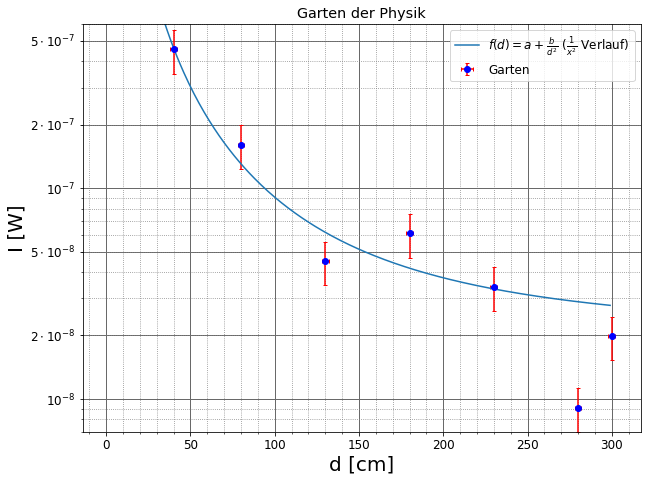

[  1.99526231e-08   9.09913273e-09   3.41192912e-08   6.09536897e-08
   4.49779855e-08   1.61064564e-07   4.54988060e-07]


In [41]:
def f1(x,a,b):
    return  a + b/(x**2)
popt1, pcov1 = curve_fit(f1, d_out1,power(I_out1), p0=[0,0 ])


plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_yscale('log')

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


plt.errorbar(d_out1,power(I_out1),yerr=I_out1_err,xerr=ud,fmt='bo', label='Garten',  ecolor="red",capsize=2)

plt.plot(np.arange(0,300), f1(np.arange(0,300), *popt1),
         label=r'$f(d)=a+\frac{b}{d^2}$ ($\frac{1}{x^2}$ Verlauf)')


plt.legend(loc=1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('d [cm]', size=20)
plt.ylabel('I [W]', size = 20)
plt.title('Garten der Physik')
plt.ylim(0,6*10**(-7))
xt = [10**-8, 2*10**-8, 5*10**-8,10**-7, 2*10**-7, 5*10**-7]

plt.yticks(xt, [r"$10^{-8}$", r"$2 \cdot 10^{-8}$", r"$5\cdot 10^{-8}$", r"$10^{-7}$",
           r"$2\cdot10^{-7}$", r"$5\cdot10^{-7}$"])
perr1 = np.sqrt(np.diag(pcov1))
print('a,b', popt1)
print('err expfit',perr1)

plt.savefig(filename='Abstand-Garten.jpg')
plt.show()
print(power(I_out1))


/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


a,b [ -3.96392848e-07   3.37714411e-02]
err expfit [  1.43876441e-07   3.93650871e-04]


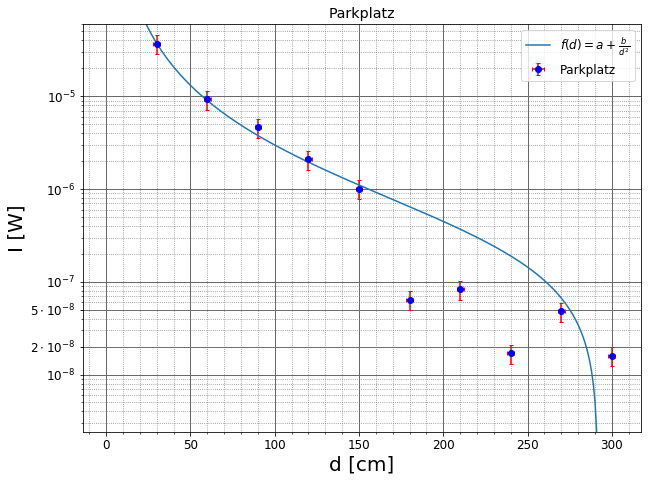

[  1.59587915e-08   4.83058802e-08   1.69044093e-08   8.31763771e-08
   6.44169266e-08   1.00693167e-06   2.08929613e-06   4.61317575e-06
   9.26829823e-06   3.69828180e-05]


In [40]:
def f(x,a,b):
    return  a + b/(x**2)
popt, pcov = curve_fit(f, d_out2,power(I_out2), p0=[0,0 ])
#plt.plot(range(0,300,10), f(range(0,300,10), *popt), label='f(d)=a+b/d (1/x Verlauf)')

plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.plot(np.arange(0,300), f(np.arange(0,300), *popt),
         label=r'$f(d)=a+ \frac{b}{d^2}$')

plt.errorbar(d_out2,power(I_out2),xerr=ud,yerr=I_out2_err,fmt='bo', label='Parkplatz', ecolor="red",capsize=2)


plt.legend(loc=1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('d [cm]', size=20)
plt.ylabel('I [W]', size = 20)
plt.title('Parkplatz')
plt.ylim(-10**(-5),6*10**(-5))
xt = [10**(-8), 2*10**(-8), 5*10**(-8), 10**-7,  10**-6, 10**-5]

plt.yticks(xt, [r"$10^{-8}$", r"$2\cdot 10^{-8}$", r"$5\cdot 10^{-8}$", r"$10^{-7}$",
           r"$10^{-6}$", r"$10^{-5}$"])

perr = np.sqrt(np.diag(pcov))
print('a,b', popt)
print('err expfit',perr)

plt.savefig(filename='Abstand-Parkplatz.jpg')
plt.show()


print(power(I_out2))

In [23]:
#I_GrH1 Messung im großem Hörsaal
#I_GrH2 Messung .....
#d in cm und I in dbm
u_IGrH = log(10)*10**(((0.5-30)/10)-1)
u_dGrH = 0.5

I_GrH1 = np.array([-47.2,-46.35,-44.22,-43.43,-41.98,-40.27,-37.7,
                  -34.15,-32.31,-26.34,-20.01])
d_GrH1 = np.array([300,270,240,210,180,150,120,90,60,30,10])

I_GrH2 = np.array([-49.37,-46.14,-42.87,-42.7,-39.6,-38.85,-36.22,-33.66,
                  -28.7,-20.09])
d_GrH2 = np.array([300,240,210,180,150,120,90,60,30,12])

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


a,b [  1.92698632e-07   9.90003391e-04]
err expfit [  1.21149304e-07   3.99149629e-05]
a,b [  3.32403068e-09   1.40547286e-03]
err expfit [  2.87154918e-08   1.28987352e-05]


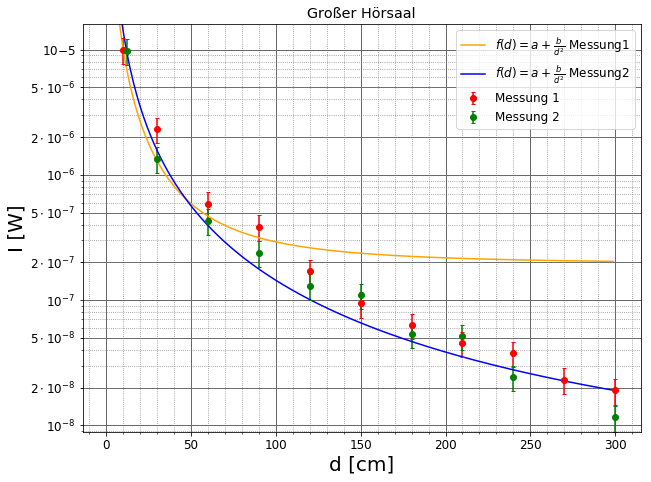

[  1.15611224e-08   2.43220401e-08   5.16416369e-08   5.37031796e-08
   1.09647820e-07   1.30316678e-07   2.38781128e-07   4.30526610e-07
   1.34896288e-06   9.79489985e-06]


In [38]:
def f2(x,a,b):
    return  a + b/(x**2)
popt2, pcov2 = curve_fit(f2, d_GrH1,power(I_GrH1), p0=[0,0 ])
popt3, pcov3 = curve_fit(f2, d_GrH2,power(I_GrH2), p0=[0,0 ])



plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



plt.plot(np.arange(0,300), f2(np.arange(0,300), *popt2),
         label=r'$f(d)=a+ \frac{b}{d^2}$ Messung1', color='orange')
plt.plot(np.arange(0,300), f2(np.arange(0,300), *popt3),
         label=r'$f(d)=a+ \frac{b}{d^2}$ Messung2', color='blue')

plt.errorbar(d_GrH1,power(I_GrH1),errorfinder(I_GrH1), fmt='o', label='Messung 1', color='red',
             capsize=2)


plt.errorbar(d_GrH2,power(I_GrH2),errorfinder(I_GrH2), fmt='o', label='Messung 2', color='green',
             capsize=2)


plt.legend(loc=1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('d [cm]', size=20)
plt.ylabel('I [W]', size = 20)
plt.title('Großer Hörsaal')
plt.ylim(-0.1*10**(-5),1.6*10**(-5))
xt = [10**-8,2*10**-8,5*10**-8, 10**-7,2*10**-7,5*10**-7,10**-6, 2*10**-6,5*10**-6, 10**-5]

plt.yticks(xt, [r"$10^{-8}$",r"$2\cdot10^{-8}$",r"$5\cdot10^{-8}$",r"$10^{-7}$",
                r"$2\cdot 10^{-7}$", r"$5\cdot 10^{-7}$", r"$10^{-6}$",
                r"$2\cdot10^{-6}$", r"$5\cdot10^{-6}$", r"$10{-5}$"])
perr2 = np.sqrt(np.diag(pcov2))
print('a,b', popt2)
print('err expfit',perr2)
perr3 = np.sqrt(np.diag(pcov3))
print('a,b', popt3)
print('err expfit',perr3)

plt.savefig(filename='Abstand-GrH.jpg')
plt.show()

print(power(I_GrH2))

In [25]:
#I_lab1 Messung im Labor

#d in cm und I in dBm
u_Ilab = 1
u_dlab = 1

I_lab1 = np.array([-32.04,-40.96,-28.4,-31.12,-29.57,-32.08,-28.34,
                  -24.69,-20.49,-14.75])
d_lab1 = np.array([300,270,240,210,180,150,120,90,60,30])

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


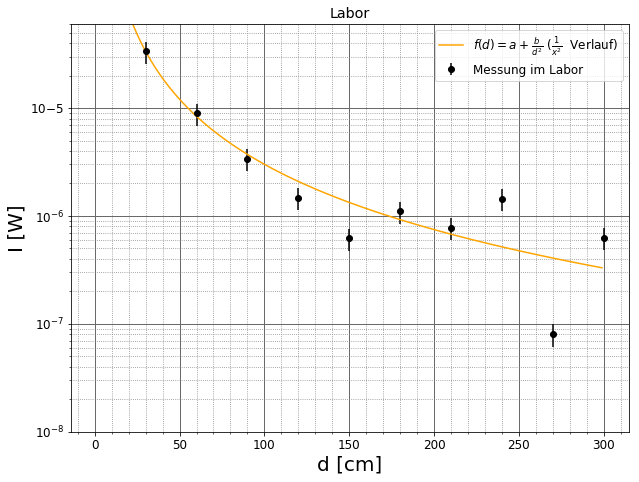

[  6.25172693e-07   8.01678063e-08   1.44543977e-06   7.72680585e-07
   1.10407862e-06   6.19441075e-07   1.46554784e-06   3.39625273e-06
   8.93305484e-06   3.34965439e-05]


In [26]:
def f3(x,a,b):
    return  a + b/(x**2)
popt4, pcov4 = curve_fit(f3, d_lab1,power(I_lab1), p0=[0,0 ])


plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.errorbar(d_lab1,power(I_lab1),errorfinder(I_lab1),fmt='o', label='Messung im Labor', color='black')
plt.plot(np.arange(0,300), f3(np.arange(0,300), *popt4),
         label=r'$f(d)=a+\frac{b}{d^2}$ ($\frac{1}{x^2}$  Verlauf)', color='orange')


plt.legend(loc=1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('d [cm]', size=20)
plt.ylabel('I [W]', size = 20)
plt.title('Labor')
plt.ylim(1.5*10**(-5),6*10**(-5))

plt.yticks([10**-8,10**-7,10**-6,10**-5], [r"$10^{-8}$",r"$10^{-7}$",r"$10^{-6}$",
                                           r"$10{-5}$"],
          size=12)

plt.savefig(filename='Abstand-Labor.jpg')
plt.show()

print(power(I_lab1))

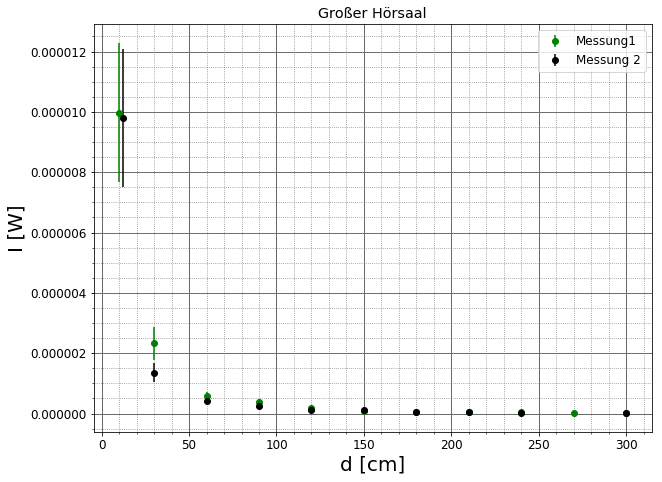

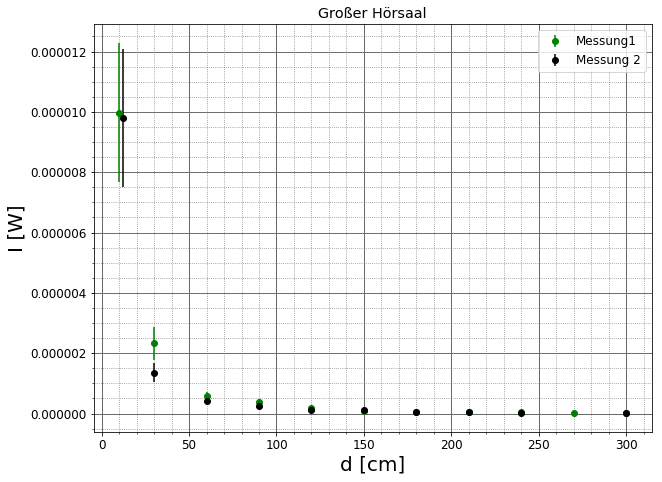

[  1.15611224e-08   2.43220401e-08   5.16416369e-08   5.37031796e-08
   1.09647820e-07   1.30316678e-07   2.38781128e-07   4.30526610e-07
   1.34896288e-06   9.79489985e-06]


In [28]:

plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


plt.errorbar(d_GrH1,power(I_GrH1),errorfinder(I_GrH1),fmt='o', label='Messung1', color='green')


plt.errorbar(d_GrH2,power(I_GrH2),errorfinder(I_GrH2), fmt='o', label='Messung 2', color='black')


plt.legend(loc=1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('d [cm]', size=20)
plt.ylabel('I [W]', size = 20)
plt.title('Großer Hörsaal')



plt.savefig(filename='bsp.jpg')
plt.show()

print(power(I_GrH2))